# SQL_telco
## Data cleaning and preperation (using SQL)

- __Project Summary:__ cleaned, prepared, and organized five tables in **MySQL**. Each section below provides a description of the actions I took on the table and a link to the corresponding .sql file. In addition, I made a few exploratory queries to explore the data.
<br>

- __Database Description:__ The Telco customer churn data contains information about a fictional telecommunications company that provided home phone and Internet services to 7043 customers in California in Q3. (_original .CSVs [here](https://github.com/jeyao1/jeffyao_portfolio/tree/main/SQL_telco/JSON%3ACSV)_)
        
        status.sql
        service.sql
        demographic.sql
        location.sql
        population.sql
        
> Source: [IBM Cognos Analytics: Telco Customer Churn](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)


## Telco ER-diagram

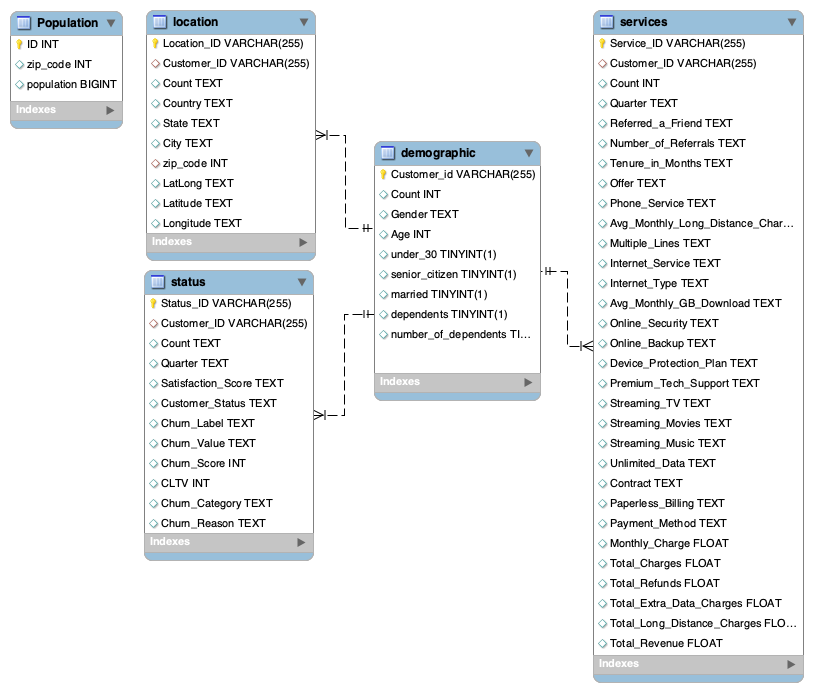

In [138]:
##ERD created in MySql.
Image(filename='misc./ERD.png')

### _**Exploratory queries_

In [159]:
Query1 = '''SELECT
                l.zip_code,
                ROUND(AVG(s.monthly_charge),3) as avgMonth
            FROM
                services s
            JOIN
                location l ON s.customer_id = l.customer_id
            WHERE
                s.tenure_in_months >= 12
                AND s.online_security = 'Yes'
                AND s.online_backup = 'Yes'
            GROUP BY
                l.zip_code
            ORDER BY
                avgMonth DESC
            LIMIT 5;'''

pd.read_sql(Query1, con=engine)

,zip_code,avgMonth
0,95461,118.75
1,92358,118.65
2,92840,118.60
3,95944,118.60
4,96019,117.60


*Here are the top 5 zip codes with the highest monthly charges among customers who have been with the company for atleast 12 months and have both online security and online backup services.*

<br>

In [162]:
Query2 = '''SELECT
                d.customer_id,
                ROUND(((s.total_revenue)-(.10*s.total_refunds)),2) as TotalRev
            FROM
                services s
            JOIN
                demographic d ON s.customer_id = d.customer_id
            LIMIT 10;'''

pd.read_sql(Query2, con=engine)

,customer_id,TotalRev
0,0002-ORFBO,974.81
1,0003-MKNFE,606.45
2,0004-TLHLJ,415.45
3,0011-IGKFF,1599.51
4,0013-EXCHZ,289.54
5,0013-MHZWF,722.38
6,0013-SMEOE,8611.41
7,0014-BMAQU,6214.28
8,0015-UOCOJ,414.06
9,0016-QLJIS,7807.80


*Here is a table where 10% of the customer's refund is subtracted from their Total Revenue.*

<br>

In [165]:
Query3 = '''SELECT
                d.customer_id,
                s.contract,
                s.monthly_charge,
                ROUND(SUM(s.monthly_charge) OVER (PARTITION BY s.contract
                                            ORDER BY s.tenure_in_months asc
                                            ROWS UNBOUNDED PRECEDING),2) AS RollingSum_by_Contract
            FROM
                demographic d
            JOIN 
                services s ON s.customer_id = d.customer_id;'''

pd.read_sql(Query3, con=engine)

,customer_id,contract,monthly_charge,RollingSum_by_Contract
0,9174-FKWZE,Month-to-Month,19.45,19.45
1,9617-INGJY,Month-to-Month,70.60,90.05
2,5043-TRZWM,Month-to-Month,75.55,165.60
3,8687-BAFGU,Month-to-Month,74.00,239.60
4,2722-JMONI,Month-to-Month,49.55,289.15
...,...,...,...,...
7038,7781-HVGMK,Two Year,65.20,117424.95
7039,6976-BWGLQ,Two Year,25.20,117450.15
7040,8125-QPFJD,Two Year,84.90,117535.05
7041,8735-SDUFN,Two Year,24.30,117559.35


*Here is a query that calculates the running total of monthly_charge for each customer, partitioned by Contract type and ordered by tenure_in_months (ascending) within each partition.*

<br>

<br>
<br>

# Clean, Prep, Organize.

In [141]:
import pandas as pd
from sqlalchemy import create_engine
import IPython
from IPython.display import Image

### CLEAN, PREPARE, AND ORGANIZE TASKS ARE ALL DONE IN MYSQL.

#hosted locally
username = 'root'
password = 'password123'
host = '127.0.0.1'
dbname = 'telco'

#connect to MySQL.
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{dbname}')

#assign SQL queries.
query_demographic = "SELECT * FROM demographic"
query_location = "SELECT * FROM location"
query_population = "SELECT * FROM population"
query_status = "SELECT * FROM status"
query_services = "SELECT * FROM services"

#assign dataFrames.
df_demographic = pd.read_sql(query_demographic, con=engine)
df_location = pd.read_sql(query_location, con=engine)
df_population = pd.read_sql(query_population, con=engine)
df_status = pd.read_sql(query_status, con=engine)
df_services = pd.read_sql(query_services, con=engine)

<br>

## [status.sql](https://github.com/jeyao1/jeffyao_portfolio/blob/main/SQL_telco/status.sql)

>* Checked count (7043) and duplicates.
>* Set Primary/Foriegn Keys: PK(status_id), FK(customer_id)
>* Verified that 'Customer_Status' column only has ('Stayed','Churned', 'Joined') values. 7043 total.


In [142]:
df_status.head()

,Status_ID,Customer_ID,Count,Quarter,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Category,Churn_Reason
0,AAEDXJ7271,2988-QRAJY,1,Q3,3,Stayed,No,0,30,5798,,
1,AAGVIW5278,2919-HBCJO,1,Q3,1,Churned,Yes,1,90,4580,Other,Moved
2,AAIFDJ8638,6670-MFRPK,1,Q3,4,Stayed,No,0,63,4072,,
3,AAIKCR2516,8519-IMDHU,1,Q3,1,Churned,Yes,1,83,4981,Competitor,Competitor had better devices
4,AAQGMP6683,0486-LGCCH,1,Q3,3,Stayed,No,0,33,3372,,


<br>

## [service.sql](https://github.com/jeyao1/jeffyao_portfolio/blob/main/SQL_telco/services.sql)
>* Set Primary/Foriegn Keys: PK(service_id), FK(customer_id)
>* ENUM 'Quarter' column to Q1,Q2,Q3,Q4 only.
>* Changed all columns with dollar values to FLOAT data type.

In [143]:
df_services.head()

,Service_ID,Customer_ID,Count,Quarter,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,AACIMLEFM1144,5868-CZJDR,1,Q3,No,0,1,Offer E,No,0.00,...,No,Month-to-Month,Yes,Mailed Check,31.35,31.35,0.00,80.0,0.00,111.35
1,AAGWGFMXQ2638,4391-RESHN,1,Q3,No,0,23,Offer D,Yes,16.28,...,Yes,Month-to-Month,Yes,Credit Card,104.05,2470.10,0.00,0.0,374.44,2844.54
2,AAHKFGKAO4831,0298-XACET,1,Q3,Yes,1,52,None,No,0.00,...,Yes,Two Year,No,Credit Card,50.20,2554.00,27.01,0.0,0.00,2526.99
3,AAKUPJDLK5463,8777-MBMTS,1,Q3,Yes,10,65,Offer B,Yes,36.49,...,Yes,Two Year,Yes,Credit Card,105.85,6725.50,0.00,0.0,2371.85,9097.35
4,AALEXAZNZ8492,0311-UNPFF,1,Q3,No,0,26,None,Yes,38.09,...,No,Month-to-Month,Yes,Bank Withdrawal,88.80,2274.35,0.00,50.0,990.34,3314.69


<br>

## [demographic.sql](https://github.com/jeyao1/jeffyao_portfolio/blob/main/SQL_telco/demographic.sql)
>* Set Primary Key: PK(customer_id)
>* Changed all columns with Yes/No values to BOOLEAN type and their values to 1/0, respectively.
>* Verified that all Customer_ID's are 10 characters (4 numbers, dash, 5 letters) and added validation rule.


In [144]:
df_demographic.head()

,Customer_id,Count,Gender,Age,under_30,senior_citizen,married,dependents,number_of_dependents
0,0002-ORFBO,1,Female,37,0,0,1,0,0
1,0003-MKNFE,1,Male,46,0,0,0,0,0
2,0004-TLHLJ,1,Male,50,0,0,0,0,0
3,0011-IGKFF,1,Male,78,0,1,1,0,0
4,0013-EXCHZ,1,Female,75,0,1,1,0,0


<br>

## [location.sql](https://github.com/jeyao1/jeffyao_portfolio/blob/main/SQL_telco/location.sql)
>* Set Primary/Foriegn Keys: PK(location_id), FK(customer_id)
>* Verified 'LatLong' column by checking if all rows equaled to CONCAT(Latitude, ',', Longitude). Slight variance for a few rows in San Diego, CA. Per Google Maps, every .00001 degree long/lat is ~5ft; slight discrepency is negligible.


In [145]:
df_location.head()

,Location_ID,Customer_ID,Count,Country,State,City,zip_code,LatLong,Latitude,Longitude
0,AACVYL9433,9606-PBKBQ,1,United States,California,Long Beach,90813,"33.781086, -118.199049",33.781086,-118.199049
1,AAISKH4288,8189-XRIKE,1,United States,California,Newark,94560,"37.504133, -122.032347",37.504133,-122.032347
2,AALVKF1536,1899-VXWXM,1,United States,California,San Diego,92130,"32.957195, -117.202542",32.957195,-117.202542
3,AASUEB7134,6559-ILWKJ,1,United States,California,Fresno,93722,"36.78979, -119.929894",36.78979,-119.929894
4,AATVWP7174,7639-OPLNG,1,United States,California,San Diego,92107,"32.741852, -117.243453",32.741852,-117.243453


<br>

## [population.sql](https://github.com/jeyao1/jeffyao_portfolio/blob/main/SQL_telco/population.sql)
>* Set Primary Key: PK(ID)
>* Verified that no zip_code exceeded 5 characters.


In [146]:
df_population.head()

,ID,zip_code,population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019
